# Importing the libraries

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset

In [217]:
dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')
#print(dataset)
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Renaming the columns

In [218]:
dataset=dataset.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'cgpa','Research':'research','Chance of Admit ':'chance'})

In [219]:
dataset.columns

Index(['no', 'gre', 'toefl', 'rating', 'sop', 'lor', 'cgpa', 'research',
       'chance'],
      dtype='object')

# EDA

In [220]:
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state = 42)

In [221]:
# checking for null values
dataset.isna().sum()

no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
cgpa        0
research    0
chance      0
dtype: int64

In [222]:
# checking for outliers
print('Mean of GRE score = ', dataset['gre'].mean())
print('Median of GRE score = ', dataset['gre'].median())
print('Mean of TOEFL Score = ', dataset['toefl'].mean())
print('Median of TOEFL Score = ', dataset['toefl'].median())
print('Mean of University Rating = ', dataset['rating'].mean())
print('Median of University Rating = ', dataset['rating'].median())
print('Mean of SOP = ', dataset['sop'].mean())
print('Median of SOP = ', dataset['sop'].median())
print('Mean of LOR = ', dataset['lor'].mean())
print('Median of LOR = ', dataset['lor'].median())
print('Mean of CGPA = ', dataset['cgpa'].mean())
print('Median of CGPA = ', dataset['cgpa'].median())
print('Mean of  Research = ', dataset['research'].mean())
print('Median of  Research = ', dataset['research'].median())
print('Mean of Chance of Admit = ', dataset['chance'].mean())
print('Median of Chance of Admit = ', dataset['chance'].median())

Mean of GRE score =  316.472
Median of GRE score =  317.0
Mean of TOEFL Score =  107.192
Median of TOEFL Score =  107.0
Mean of University Rating =  3.114
Median of University Rating =  3.0
Mean of SOP =  3.374
Median of SOP =  3.5
Mean of LOR =  3.484
Median of LOR =  3.5
Mean of CGPA =  8.57644
Median of CGPA =  8.56
Mean of  Research =  0.56
Median of  Research =  1.0
Mean of Chance of Admit =  0.72174
Median of Chance of Admit =  0.72


In [223]:
dataset.describe()

,no,gre,toefl,rating,sop,lor,cgpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [224]:
dataset.groupby('rating').mean()

,no,gre,toefl,sop,lor,cgpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### As rating increases chance of admission also increases

<Figure size 1440x1440 with 0 Axes>

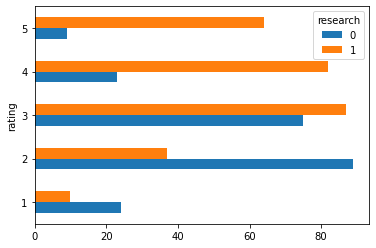

In [225]:
fig = plt.figure(figsize=(20,20));
pd.crosstab(dataset['rating'],dataset.research).plot(kind='barh');

### if you want to go to university with high rating, you need research experience.

# Data Preprocessing

In [226]:
# extracting features
x = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, -1].values
#print(x)
#print(y)

In [227]:
#scaling the features
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
x = sc.fit_transform(x)
#print(x)

In [228]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split as TTS
x_train, x_test, y_train, y_test = TTS(x, y, test_size = 0.25, random_state = 0)

# Multiple Linear Regerssion(MLR)

In [229]:
# training the model
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(x_train, y_train)

LinearRegression()

In [230]:
# predicting the output
y_pred = lr.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

In [231]:
# checking for errors
import sklearn.metrics as met
print('MSE = ', met.mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(met.mean_squared_error(y_test, y_pred)))
print('R2 = ', met.r2_score(y_test, y_pred))

MSE =  0.003546854384369631
RMSE =  0.05955547316888374
R2 =  0.837218729569142


Feature: 0, Score: 0.02235
Feature: 1, Score: 0.01751
Feature: 2, Score: 0.00969
Feature: 3, Score: 0.00096
Feature: 4, Score: 0.01587
Feature: 5, Score: 0.06720
Feature: 6, Score: 0.01066


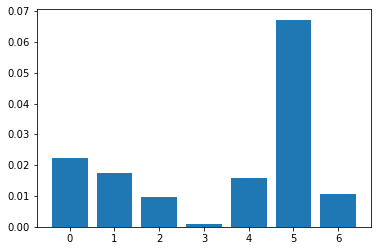

In [232]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [233]:
x_back = x[:, :]
x_back = np.append(arr = np.ones((500, 1)).astype(int), values = x_back, axis = 1)
print(x_back)

[[ 1.          1.55337086  1.44968975 ...  0.01730621  1.59474966
   0.88640526]
 [ 1.         -0.21907421  0.13298698 ...  0.55812525  0.76721964
   0.88640526]
 [ 1.         -0.13045196 -0.36077656 ... -1.06433187 -1.53331383
  -1.12815215]
 ...
 [ 1.         -1.28254125 -1.34830364 ... -1.60515091 -2.19533785
  -1.12815215]
 [ 1.         -0.66218548 -0.36077656 ...  0.55812525 -1.48366203
  -1.12815215]
 [ 1.         -0.21907421 -0.19618871 ...  0.01730621 -0.5402778
  -1.12815215]]


# Backward Elimination

In [234]:
import statsmodels.api as sm
def BackwardElimination(x, SL):
    numCols = len(x[0])  #to find number of columns in x
    for i in range(0, numCols):
        back = sm.OLS(y, x).fit()   #calculate p values
        maxp = max(back.pvalues).astype(float) #find max p value
        if maxp > SL:
            for j in range(0, numCols - i):
                if maxp == back.pvalues[j].astype(float):
                        x = np.delete(x, j, 1)
    print(back.summary())
    return x

In [235]:
x_opt = np.array(x_back[:, [0, 1, 2, 3, 4, 5, 6, 7]], dtype = float)
x_opt = BackwardElimination(x_opt, 0.05)
print(x_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sun, 12 Jul 2020   Prob (F-statistic):          9.97e-182
Time:                        19:21:58   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    268.651      0.0

In [236]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split as TTS
x_train, x_test, y_train, y_test = TTS(x_opt, y, test_size = 0.25, random_state = 0)

In [237]:
# training the model
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(x_train, y_train)

LinearRegression()

In [238]:
# predicting the output
y_pred = lr.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

In [239]:
# checking for errors
import sklearn.metrics as met
print('MSE = ', met.mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(met.mean_squared_error(y_test, y_pred)))
print('R2 = ', met.r2_score(y_test, y_pred))

MSE =  0.003500806204821625
RMSE =  0.059167611113020484
R2 =  0.8393320898471635


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02333
Feature: 2, Score: 0.01911
Feature: 3, Score: 0.01840
Feature: 4, Score: 0.07118
Feature: 5, Score: 0.01073


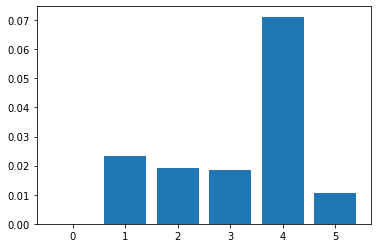

In [240]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### CGPA has the highest importance

# Predicted vs actual output plot

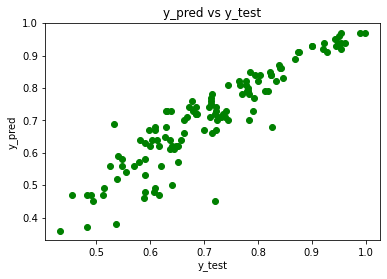

In [241]:
plt.scatter(y_pred, y_test, color = 'green')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Text(0.5, 1.0, 'Predicted')

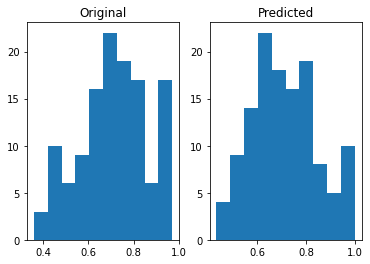

In [242]:
plt.subplot(1,2,1)
plt.hist(y_test, bins = 10)
plt.title("Original")
plt.subplot(1,2,2)
plt.hist(y_pred, bins = 10)
plt.title("Predicted")